In [92]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the movie data
df = pd.read_csv("IMDb Movies India.csv", encoding="latin1")

# Display basic information about the data
df.head()



,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [93]:
# Check for missing values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [94]:
# Drop rows with missing values in the 'Rating' column
df.dropna(subset=["Rating"], inplace=True)

# Drop rows with missing values in specified columns
df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], inplace=True)

# Clean columns: 'Votes', 'Year', 'Duration'
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].str.strip('()').astype(int)
df['Duration'] = df['Duration'].str.strip('min').astype(float)
df['Duration'].fillna(df['Duration'].median(), inplace=True)

# Display the cleaned data
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [95]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

<ipython-input-96-321dca5e9bb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x="Name", y="Rating", palette="Blues")


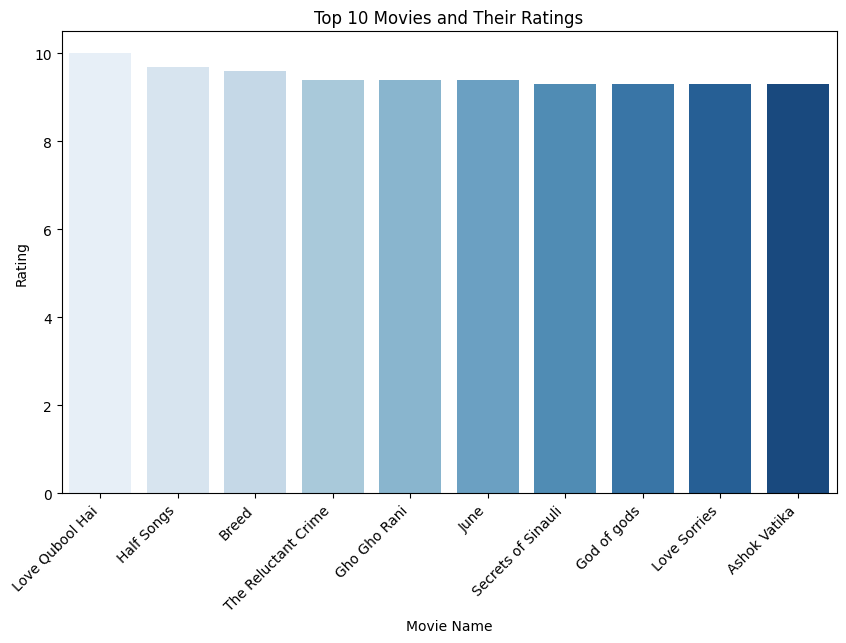

In [96]:
#visualization for the distribution of top 10 movies
plt.figure(figsize=(10, 6))
sns.barplot(data=top_movies, x="Name", y="Rating", palette="Blues")
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Movies and Their Ratings')
plt.xlabel('Movie Name')
plt.ylabel('Rating')
plt.show()


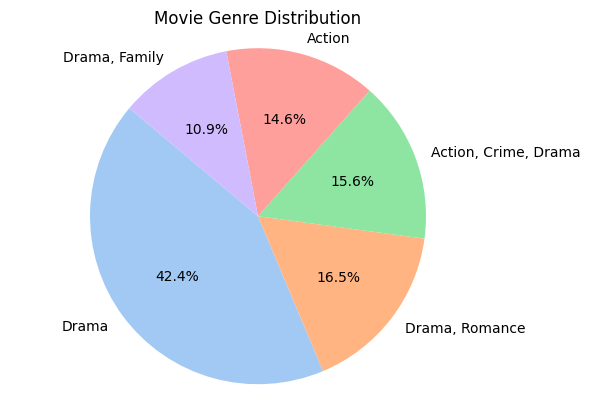

In [97]:
# Display the distribution of movie genres
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
top_n_genres = genre_counts.head(5)

plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution')
plt.axis('equal')
plt.show()


<ipython-input-98-4cfa348f81fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='Director', y='Rating', palette='plasma')


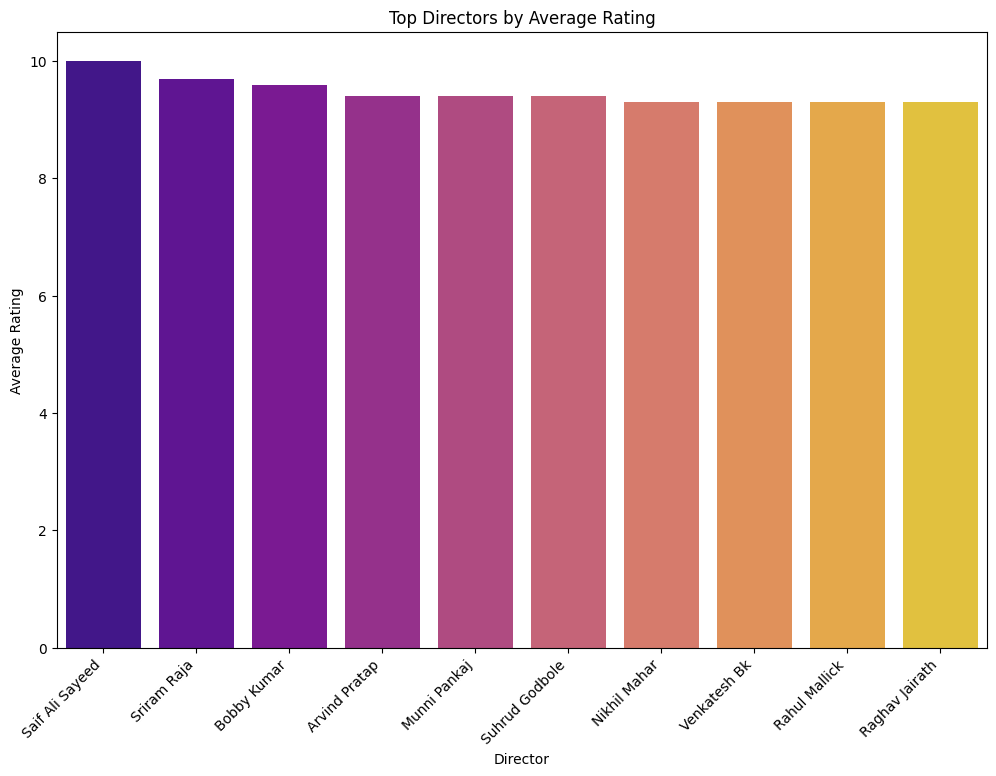

In [98]:
# visualization for the distribution of top directors by average rating
plt.figure(figsize=(12, 8))
sns.barplot(data=top_directors, x='Director', y='Rating', palette='plasma')
plt.title('Top Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


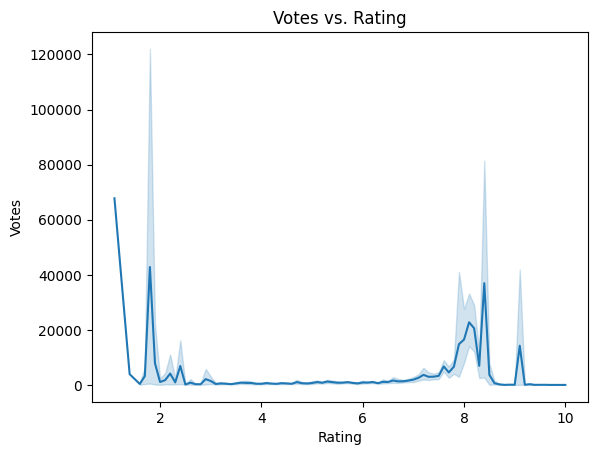

In [99]:
# Display the relationship between the number of votes and movie ratings
sns.lineplot(data=df, x='Rating', y='Votes')
plt.title('Votes vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()


<ipython-input-100-fa3141c0e7ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', palette='mako')


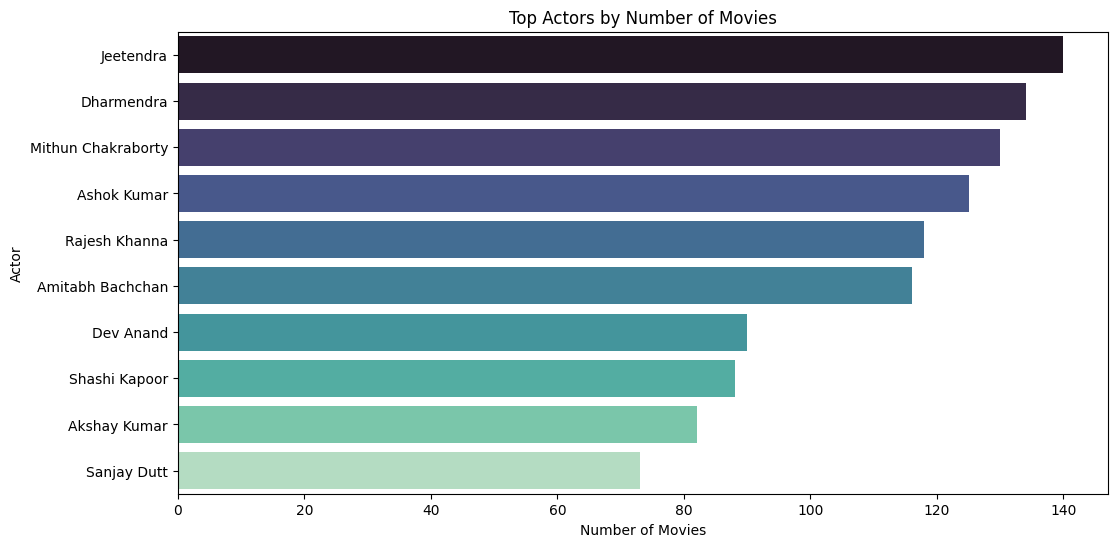

In [100]:
# visualization for the distribution of top actors by the number of movies
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', palette='mako')
plt.title('Top Actors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()



<ipython-input-101-8e3675e45822>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


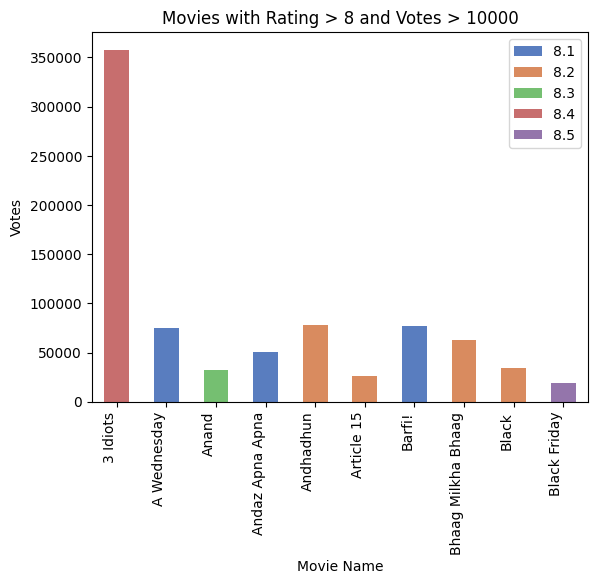

In [101]:
# Display movies with rating greater than 8 and votes greater than 10000
filtered_df = df[(df['Rating'] > 8) & (df['Votes'] > 10000)].head(10)

ax = sns.barplot(data=filtered_df, x='Name', y='Votes', hue='Rating', dodge=False, width=0.5, palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with Rating > 8 and Votes > 10000')
plt.show()


<ipython-input-102-26305642ebb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')


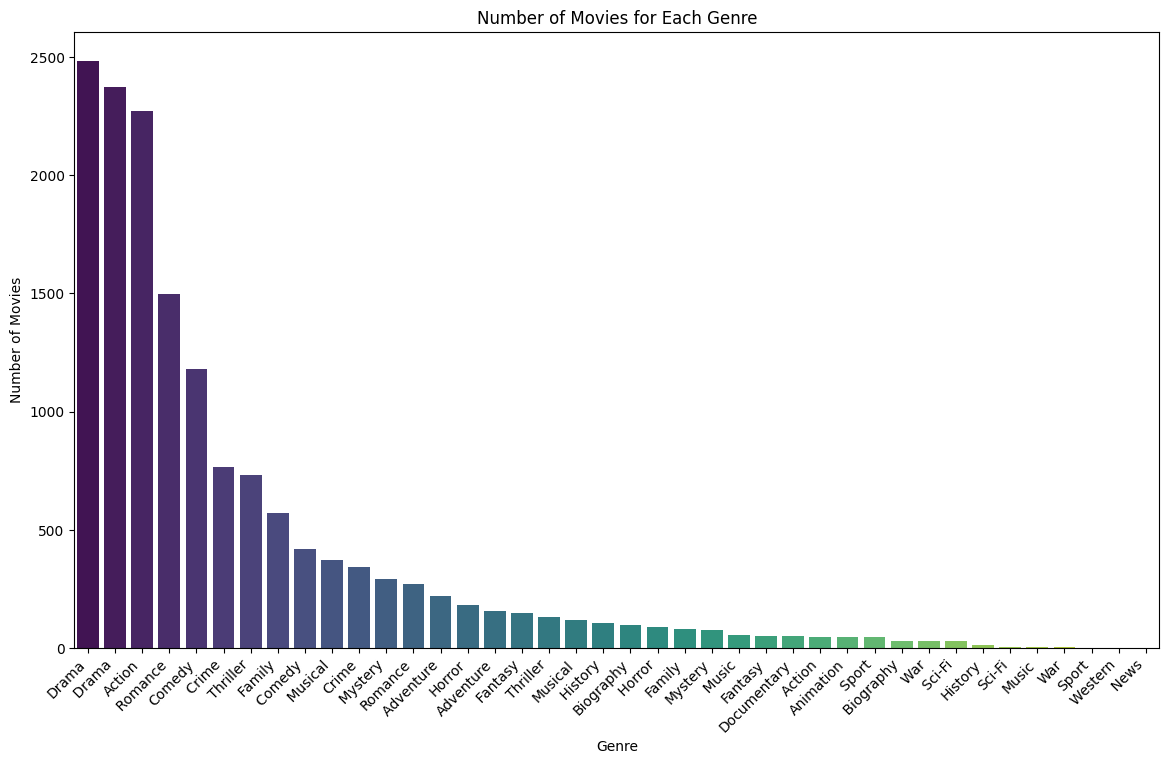

In [102]:
# New visualization for the distribution of the number of movies for each genre
plt.figure(figsize=(14, 8))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')
plt.title('Number of Movies for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()


In [103]:
# Use LabelEncoder and MinMaxScaler for feature engineering
labelencoder = LabelEncoder()

trans_data = df.drop(['Name'], axis=1)

# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(df['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(df['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(df['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(df['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(df['Genre'].apply(lambda x: ', '.join(x)))

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data, columns=trans_data.columns)
sc_df.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


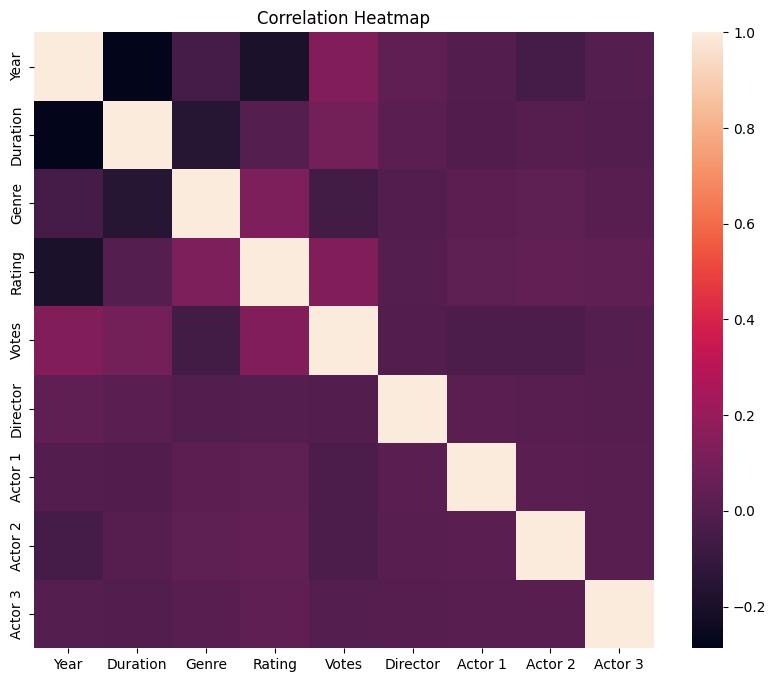

In [104]:
# Display the correlation matrix heatmap
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [105]:
# Model Building
X = sc_df.drop(['Rating'], axis=1)
y = sc_df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Choose a machine learning model (Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display model evaluation metrics
print('R2 score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


R2 score: 0.08483347672034824
Mean Squared Error: 0.021427690019394013
Mean Absolute Error: 0.11557719609312413


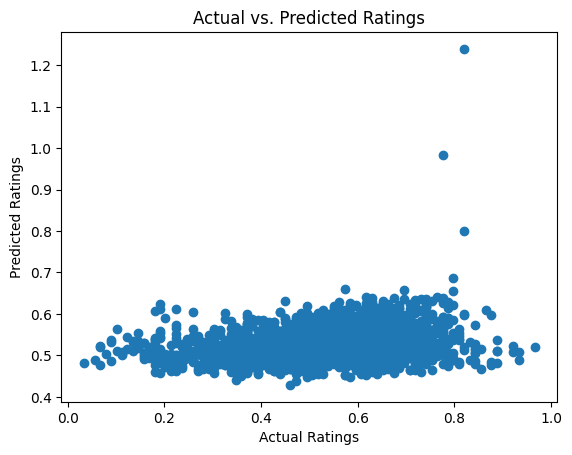

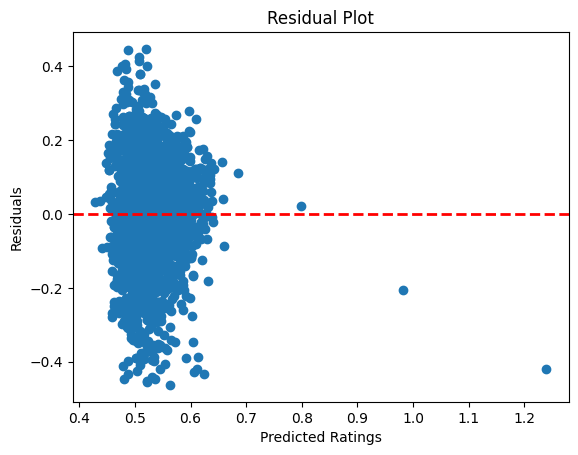

In [106]:
# Scatter plot of actual vs. predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()

# Residual plot to examine the model's errors
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
